##  Introduction of Support Vector Machine

支持向量机（Support Vector Machine, SVM）是一类按监督学习（supervised learning）方式对数据进行二元分类的广义线性分类器（generalized linear classifier），其决策边界是对学习样本求解的最大边距超平面(maximum-margin hyperplane)。支持向量机(svm)的想法与前面介绍的感知机模型类似，找一个超平面将正负样本分开，但svm的想法要更深入了一步，它要求正负样本中离超平面最近的点的距离要尽可能的大，所以svm模型建模可以分为两个子问题： 
1. 将正负样本尽可能分开
2. 让两类样本离超平面距离尽可能远

## Definition of SVM

SVM的目标函数可以表示为：
$$
f(x)=sign(w^Tx+b)
$$  

对于样本对$(x,y)$，只要$w^Tx+b$和$y$的符号相同，就意味着分对了，即$y\cdot (w^Tx+b)>0$。解决了分对的问题后要解决怎样使得超平面离两类样本点尽可能远即
$$
\max ~d
$$
当达到要求时，超平面距离正负样本的距离一定是一样的，点到超平面的距离表示为：
$$
d=\frac{|w^Tx+b|}{||w||}
$$  
参数$w,b$可以等比例的变化，而不会影响到模型自身，所以$|w^Tx+b|=1$自然也可以满足，所以这时最近的点的距离可以表示为：

$$
d^*=\frac{1}{||w||}
$$
同时第一个子问题的条件要调整为$y\cdot(w^Tx+b)\geq1$，而$\max d^*$可以等价的表示为$\min \frac{1}{2}w^Tw$，所以svm模型的求解可以表述为如下优化问题：  

$$
\max _{w,b} \frac{1}{w^Tw} \\
s.t.~~~~y_i(w^Tx_i+b)\geq 1,i=1,2,...,N
$$
通常情况下我们习惯写成最小化问题，因此可以重新表示为：
$$
\min_{w,b} \frac{1}{2}w^Tw \\
s.t.~~~~y_i(w^Tx_i+b)\geq 1,i=1,2,...,N
$$

## Lagrangian Duality

对于上面优化问题的求解往往转化为对其对偶问题的求解，首先，构造其拉格朗日函数：
$$
L(w,b,\lambda)=\frac{1}{2}w^Tw+\sum_{i=1}^N \lambda_i(1-y_i(w^Tx_i+b)),\lambda=[\lambda_1,\lambda_2,...,\lambda_N]
$$  
这时，原优化问题（设为$P$）就等价于：  

$$
\min_{w,b}\max_{\lambda}L(w,b,\lambda)\\
s.t.~~~~\lambda_i\geq 0,i=1,2,...,N
$$  



### Karush–Kuhn–Tucker conditions

首先最优解一定满足原问题的约束条件：
$$
1-y_i({w^*}^Tx_i+b)\leq0,i=1,2,...,N
$$  
其次还要满足对偶问题的约束条件：
$$
\lambda_i^*\geq0,i=1,2,...,N\\
$$
互补松弛条件：
$$
\lambda_i^*(1-y_i({w^*}^Tx_i+b^*))=0,i=1,2,...,N
$$  
$L(w,b,\lambda)$关于$w,b$的偏导为0，即：
$$
w=\sum_{i=1}^N\lambda_iy_ix_i\\
0=\sum_{i=1}^N\lambda_iy_i
$$
将上述两式$w$和$b$带入对偶问题可得：
$$
\max_{\lambda} \sum_{i=1}^N\lambda_i-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\lambda_i\lambda_jy_iy_jx_i^Tx_j\\
s.t.\sum_{i=1}^N\lambda_iy_i=0,\\
\lambda\geq0,i=1,2,...,N
$$  
将最大化问题转化为最小化问题有：
$$
\min_{\lambda} \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\lambda_i\lambda_jy_iy_jx_i^Tx_j-\sum_{i=1}^N\lambda_i\\
s.t.\sum_{i=1}^N\lambda_iy_i=0,\\
\lambda_i\geq0,i=1,2,...,N
$$
支持向量机问题在模型上非常简单，但是其求解却相当困难。SVM的对偶问题使用二次规划的软件包一定可以暴力求解得到最优解，但是它的复杂度非常高，主要原因有：
1. 变量数与样本数相同，每个变量$\lambda_i$对应样本$(x_i,y_i)$；
2. 约束条件数也与样本数相同；


这里我们假设$\lambda_i$已经求出来了，那么根据$w=\sum_{i=1}^N\lambda_iy_ix_i$可以求出最优的$w^*$，对于b可以通过以下公式求得：
$$
b = -\frac{\max_{i,y_i=-1}w^{*T}x_i+\min_{i,y_i=1}w^{*T}x_i}{2}
$$
实际上$b$的计算也可以简单根据$1-y_i({w^*}^Tx_i+b^*)=0$，得到$b^*=y_i-{w^*}^Tx_i$   

可以看出一旦$\lambda_i$求出，那么$w$和$b$也可以相应确定，因此问题的关键是求解$\lambda_i$

## SMO algorithm for solving SVM

序列最小优化算法(Sequential minimal optimization, SMO)是一种用于解决支持向量机训练过程中所产生优化问题的算法。SMO由微软研究院的约翰·普莱特于1998年发明，被广泛使用于SVM的训练过程中，并在通行的SVM库LIBSVM中得到实现。1998年，SMO算法发表在SVM研究领域内引起了轰动，因为先前可用的SVM训练方法必须使用复杂的方法，并需要昂贵的第三方二次规划工具。而SMO算法较好地避免了这一问题。 

序列最小最优化化(sequential minimal optimization,SMO)算法是求解SVM对偶问题的一种启发式算法，它的思路是：**每次只选择一个变量优化，而固定住其他变量**。

比如选择$\lambda_1$进行优化，而固定住$\lambda_i,i=2,3,...,N$，但由于我们的问题中有一个约束：$\sum_i^N\lambda_iy_i=0$，需要另外选择一个$\lambda_2$来配合$\lambda_1$做改变，当两者中任何一个变量确定后，另外一个也就随之确定了，比如确定$\lambda_2$后：  

$$
\lambda_1=-y_i\sum_{i=2}^N\lambda_iy_i
$$  
这里等式右边应该是$\frac{1}{y_1}$，但是由于$y$只取$\{1,-1\}$，因此可以直接写作$y_i$。

假定我们先选择$\lambda_1$和$\lambda_2$进行优化，那么把$\lambda_1$和$\lambda_2$单独分离出来可以得到：
$$
\min_{\lambda_1,\lambda_2}\frac{1}{2}\lambda_1^2 x_1^Tx_1+\frac{1}{2}\lambda_2^2x_2^Tx_2+\lambda_1\lambda_2y_1y_2x_1^Tx_2+\frac{1}{2}\lambda_1y_1x_1^T\sum_{i=3}^N\lambda_iy_ix_i+\frac{1}{2}\lambda_2y_2x_2^T\sum_{i=3}^N\lambda_iy_ix_i-\lambda_1-\lambda_2\\
s.t.~~~~\lambda_1y_1+\lambda_2y_2=-\sum_{i=3}^N\lambda_iy_i=\eta\\
\lambda_1\geq0,\lambda_2\geq0
$$  
剩余的$\lambda_3, \lambda_4,..., \lambda_N$都看作常量。

利用$\lambda_1=-y_i\sum_{i=2}^N\lambda_iy_i$把$\lambda_1$消掉，并整理可以得到：
$$
\min_{\lambda_2}\frac{1}{2}(x_1-x_2)^T(x_1-x_2)\lambda_2^2+(-y_2\eta x_1^Tx_1+y_1\eta x_1^Tx_2+\frac{1}{2}y_2x_2^T\gamma-\frac{1}{2}y_2x_1^T\gamma-1+y_1y_2)\lambda_2\\
s.t.~~~~\lambda_2\geq0,y_1(\eta-\lambda_2y_2)\geq0
$$  
其中，$\eta=-\sum_{i=3}^N\lambda_iy_i,\gamma=\sum_{i=3}^N\lambda_iy_ix_i$  

可以目标函数就是关于$\lambda_2$的二次函数，因此可以直接求解得到：
$$
\lambda_2^{unc}=-\frac{-y_2\eta x_1^Tx_1+y_1\eta x_1^Tx_2+\frac{1}{2}y_2x_2^T\gamma-\frac{1}{2}y_2x_1^T\gamma-1+y_1y_2}{(x_1-x_2)^T(x_1-x_2)}(公式1)
$$
我们希望在$\lambda_i^k$下一次的迭代中使用上一次迭代中的值$\lambda_i^{k-1}$来加速收敛。

前面已经知道$w$的最优解$w=\sum_{i=1}^N\lambda_iy_ix_i\$,再把求出的$\lambda_i$带进去可以写出预测得到的分离超平面：
$$
g(x)=\sum_{i=1}^N\lambda_iy_ix_i^Tx+b
$$  
记：  
$$
E_i=g(x_i)-y_i
$$  
这里$g(x)$表示模型对$x$的预测值，$E_i$表示预测值与真实值之差，于是我们有： 
$$
x_1^T\gamma=g(x_1)-\lambda_1^{old}y_1x_1^Tx_1-\lambda_2^{old}y_2x_2^Tx_1-b^{old}\\
x_2^T\gamma=g(x_2)-\lambda_1^{old}y_1x_1^Tx_2-\lambda_2^{old}y_2x_2^Tx_2-b^{old}
$$

另外：  

$$
\eta=\lambda_1^{old}y_1+\lambda_2^{old}y_2
$$
带入最优解表达式，可得：  

$$
\lambda_2^{unc}=\lambda_2^{old}+\frac{y_2(E_1^{old}-E_2^{old})}{\beta}
$$  

这里$\beta=(x_1-x_2)^T(x_1-x_2)$，到这一步，可以发现计算量大大降低，因为$E_1^{old},E_2^{old}$可先缓存到内存中，再根据$\lambda_2$的约束条件$\lambda_2\geq0,y_1(\eta-\lambda_2y_2)\geq0$，所以需要进一步对它的最优解分情况讨论：  

当$y_1y_2=1$时，
$$
\lambda_2^{new}=\left\{\begin{matrix}
0 & \lambda_2^{unc}<0\\ 
\lambda_2^{unc} & 0\leq\lambda_2^{unc}\leq \lambda_1^{old}+\lambda_2^{old}\\ 
\lambda_1^{old}+\lambda_2^{old} & \lambda_2^{unc}>\lambda_1^{old}+\lambda_2^{old}
\end{matrix}\right.
$$  

当$y_1y_2=-1$时，  

$$
\lambda_2^{new}=\left\{\begin{matrix}
\lambda_2^{unc} & \lambda_2^{unc}\geq max\{0,\lambda_2^{old}-\lambda_1^{old}\}\\ 
max\{0,\lambda_2^{old}-\lambda_1^{old}\} & \lambda_2^{unc}< max\{0, \lambda_2^{old}-\lambda_1^{old}\}
\end{matrix}\right.
$$  

到这儿，我们可以发现，SMO算法可以极大的方便$Q^*$的求解，而且是以解析解方式，得到$\lambda_2^{new}$后，由于$\lambda_1^{new}y_1+\lambda_2^{new}y_2=\lambda_1^{old}y_1+\lambda_2^{old}y_2$，可得到$\lambda_1^{new}$的更新公式：  
$$
\lambda_1^{new}=\lambda_1^{old}+y_1y_2(\lambda_2^{old}-\lambda_2^{new})
$$

最后，得到$w$的更新公式：  

$$
w^{new}=w^{old}+(\lambda_1^{new}-\lambda_1^{old})y_1x_1+(\lambda_2^{new}-\lambda_2^{old})y_2x_2
$$


**对$b$和$E$的更新**

而对于$b$的更新同样借助于$\lambda_1,\lambda_2$更新，在更新后，倾向于$\lambda_1^{new}>0,\lambda_2^{new}>0$，还记得前面的互补松弛条件吧（条件4），即对于$\lambda_i>0$的情况，必然要有$1-y_i(w^Tx_i+b)=0$成立，即$w^Tx_i+b=y_i$，所以对$(x_1,y_1),(x_2,y_2)$有如下关系：  

$$
{w^{new}}^Tx_1+b=y_1\\
{w^{new}}^Tx_2+b=y_2\\
$$  
对关系4和关系5可以分别计算出$b_1^{new}=y_1-{w^{new}}^Tx_1,b_2^{new}=y_2-{w^{new}}^Tx_2$，对$b$的更新，可以取两者的均值：  

$$
b^{new}=\frac{b_1^{new}+b_2^{new}}{2}
$$  

接下来，对于$E_1,E_2$的更新就很自然了：  

$$
E_1^{new}={w^{new}}^Tx_1+b^{new}-y_1\\
E_2^{new}={w^{new}}^Tx_2+b^{new}-y_2
$$
那接下来还有一个问题，那就是$\lambda_1,\lambda_2$如何选择的问题  

**如何选择两个优化变量？**  

这可以启发式选择，分为两步：第一步是如何选择$\lambda_1$，第二步是在选定$\lambda_1$时，如何选择一个不错的$\lambda_2$：  

**$\lambda_1$的选择**   

选择$\lambda_1$同感知机模型类似，选择一个不满足KKT条件的点$(x_i,y_i)$，即不满足如下两种情况之一的点：  

$$
\left\{\begin{matrix}
\lambda_i=0\Leftrightarrow  y_i(w^Tx_i+b)\geq1\\ 
\lambda_i>0\Leftrightarrow  y_i(w^Tx_i+b)=1
\end{matrix}\right.
$$

**$\lambda_2$的选择**  

对$\lambda_2$的选择倾向于选择使其变化尽可能大的点，由前面的更新公式可知是使$\mid E_1^{old}-E_2^{old}\mid$最大的点，所以选择的两个点$(x_1,y_1)$和$(x_2,y_2)$会更倾向于选择异类的点

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
%matplotlib inline

In [36]:
def plot_decision_function(X, y, clf, support_vectors=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')
    # 绘制支持向量
    if support_vectors is not None:
        plt.scatter(X[support_vectors, 0], X[support_vectors, 1], s=80, c='none', alpha=0.7, edgecolor='red')
def sigmoid(x2):
    """
    sigmoid函数
    :param x2:
    :return:
    """
    x = copy.deepcopy(x2)
    if type(x) is int:
        x = 20.0 if x > 20.0 else x
        x = -100.0 if x < -100.0 else x
    else:
        # 避免下溢
        x[x > 20.0] = 20.0
        # 避免上溢
        x[x < -100.0] = -100.0
    return 1 / (1 + np.exp(-x))

class HardMarginSVM(object):
    def __init__(self, epochs=100):
        self.w = None
        self.b = None
        self.alpha = None
        self.E = None
        self.epochs = epochs
        # 记录支持向量
        self.support_vectors = None

    def init_params(self, X, y):
        """
        :param X: (n_samples,n_features)
        :param y: (n_samples,) y_i\in\{0,1\}
        :return:
        """
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = .0
        self.alpha = np.zeros(n_samples)
        self.E = np.zeros(n_samples)
        # 初始化E
        for i in range(0, n_samples):
            self.E[i] = np.dot(self.w, X[i, :]) + self.b - y[i]

    def _select_j(self, best_i):
        """
        选择j
        :param best_i:
        :return:
        """
        valid_j_list = [i for i in range(0, len(self.alpha)) if self.alpha[i] > 0 and i != best_i]
        best_j = -1
        # 优先选择使得|E_i-E_j|最大的j
        if len(valid_j_list) > 0:
            max_e = 0
            for j in valid_j_list:
                current_e = np.abs(self.E[best_i] - self.E[j])
                if current_e > max_e:
                    best_j = j
                    max_e = current_e
        else:
            # 随机选择
            l = list(range(len(self.alpha)))
            seq = l[: best_i] + l[best_i + 1:]
            best_j = random.choice(seq)
        return best_j

    def _meet_kkt(self, w, b, x_i, y_i, alpha_i):
        """
        判断是否满足KKT条件

        :param w:
        :param b:
        :param x_i:
        :param y_i:
        :return:
        """
        if alpha_i < 1e-7:
            return y_i * (np.dot(w, x_i) + b) >= 1
        else:
            return abs(y_i * (np.dot(w, x_i) + b) - 1) < 1e-7

    def fit(self, X, y2, show_train_process=False):
        """

        :param X:
        :param y2:
        :param show_train_process: 显示训练过程
        :return:
        """
        y = copy.deepcopy(y2)
        y[y == 0] = -1
        # 初始化参数
        self.init_params(X, y)
        for _ in range(0, self.epochs):
            if_all_match_kkt = True
            for i in range(0, len(self.alpha)):
                x_i = X[i, :]
                y_i = y[i]
                alpha_i_old = self.alpha[i]
                E_i_old = self.E[i]
                # 外层循环：选择违反KKT条件的点i
                if not self._meet_kkt(self.w, self.b, x_i, y_i, alpha_i_old):
                    if_all_match_kkt = False
                    # 内层循环，选择使|Ei-Ej|最大的点j
                    best_j = self._select_j(i)

                    alpha_j_old = self.alpha[best_j]
                    x_j = X[best_j, :]
                    y_j = y[best_j]
                    E_j_old = self.E[best_j]

                    # 进行更新
                    # 1.首先获取无裁剪的最优alpha_2
                    eta = np.dot(x_i - x_j, x_i - x_j)
                    # 如果x_i和x_j很接近，则跳过
                    if eta < 1e-3:
                        continue
                    alpha_j_unc = alpha_j_old + y_j * (E_i_old - E_j_old) / eta
                    # 2.裁剪并得到new alpha_2
                    if y_i == y_j:
                        if alpha_j_unc < 0:
                            alpha_j_new = 0
                        elif 0 <= alpha_j_unc <= alpha_i_old + alpha_j_old:
                            alpha_j_new = alpha_j_unc
                        else:
                            alpha_j_new = alpha_i_old + alpha_j_old
                    else:
                        if alpha_j_unc < max(0, alpha_j_old - alpha_i_old):
                            alpha_j_new = max(0, alpha_j_old - alpha_i_old)
                        else:
                            alpha_j_new = alpha_j_unc

                    # 如果变化不够大则跳过
                    if np.abs(alpha_j_new - alpha_j_old) < 1e-5:
                        continue
                    # 3.得到alpha_1_new
                    alpha_i_new = alpha_i_old + y_i * y_j * (alpha_j_old - alpha_j_new)
                    # 4.更新w
                    self.w = self.w + (alpha_i_new - alpha_i_old) * y_i * x_i + (alpha_j_new - alpha_j_old) * y_j * x_j
                    # 5.更新alpha_1,alpha_2
                    self.alpha[i] = alpha_i_new
                    self.alpha[best_j] = alpha_j_new
                    # 6.更新b
                    b_i_new = y_i - np.dot(self.w, x_i)
                    b_j_new = y_j - np.dot(self.w, x_j)
                    if alpha_i_new > 0:
                        self.b = b_i_new
                    elif alpha_j_new > 0:
                        self.b = b_j_new
                    else:
                        self.b = (b_i_new + b_j_new) / 2.0
                    # 7.更新E
                    for k in range(0, len(self.E)):
                        self.E[k] = np.dot(self.w, X[k, :]) + self.b - y[k]


            # 如果所有的点都满足KKT条件，则中止
            if if_all_match_kkt is True:
                break
        # 计算支持向量
        self.support_vectors = np.where(self.alpha > 1e-3)[0]
        # 利用所有的支持向量，更新b
        self.b = np.mean([y[s] - np.dot(self.w, X[s, :]) for s in self.support_vectors.tolist()])


    def get_params(self):
        """
        输出原始的系数
        :return: w
        """

        return self.w, self.b

    def predict_proba(self, x):
        """
        :param x:ndarray格式数据: m x n
        :return: m x 1
        """
        return sigmoid(x.dot(self.w) + self.b)

    def predict(self, x):
        """
        :param x:ndarray格式数据: m x n
        :return: m x 1
        """
        proba = self.predict_proba(x)
        return (proba >= 0.5).astype(int)

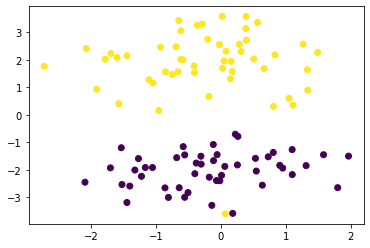

In [37]:
from sklearn.datasets import make_classification
# 生成分类数据
data, target = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=1, n_redundant=0,
                                   n_repeated=0, n_clusters_per_class=1, class_sep=2.0)
plt.scatter(data[:,0],data[:,1],c=target)

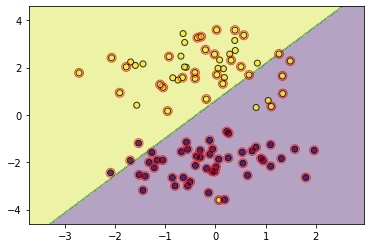

In [38]:
svm = HardMarginSVM()
svm.fit(data, target)
plot_decision_function(data, target, svm, svm.support_vectors)